In [33]:
# Importing all the necessary libraries for predicting mnist dataset

# We, are importing few layers from the tensorflow.keras.layers API
# Since, we are working with image and we know that in order to 
# work on images we have to train an CNN (Convolution Neural Network) Model.
# Also, we know that the images are in the form of 2-Dimention repesenting (x, y)

# Imformation regarding the imports from tensorflow.keras.layers:-
# ** Use In-build help() function for more detail **
# Conv2D :- 
# MaxPooling2D :-
# Flatten :-
# Dropout :-
# Dense :- 

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense # For model layers of CNN
from tensorflow.keras.datasets import mnist # For loading the dataset using load_data() function
from tensorflow.keras.utils import to_categorical # For one-hot encoding y_train_labels and y_test_labels
from tensorflow.keras import Sequential, Input # Sequential model and Input to CNN model
from tensorflow.keras.models import load_model # To load the saved model.
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # For confusion matrix sns.heatmap()
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# Loading the mnist dataset and splitting in train dataset and test dataset


(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [8]:
print(f"{' Information regarding the X_train_images ':#^70}", end = "\n\n")
print(f"X_train_images shape:- {X_train_images.shape}")
print(f"Number of sample images:- {X_train_images.shape[0]}")
print(f"Image height :- {X_train_images.shape[1]}")
print(f"Image width:- {X_train_images.shape[2]}")
print(f"Shape of the first image in X_train_images:- {X_train_images[0].shape}")
print("Note:- This dataset does not have a color channel, So, we will added it when pre-processing images")
# Finding out what is the mininum and maximum value in X_train_images and X_test_images
print(f"Maximum value in X_train_images:- {np.max(X_train_images[0])}")
print(f"Minimum value of the X_train_images:- {np.min(X_train_images[0])}")

############## Information regarding the X_train_images ##############

X_train_images shape:- (60000, 28, 28)
Number of sample images:- 60000
Image height :- 28
Image width:- 28
Shape of the first image in X_train_images:- (28, 28)
Note:- This dataset does not have a color channel, So, we will added it when pre-processing images
Maximum value in X_train_images:- 255
Minimum value of the X_train_images:- 0


In [9]:
print(f"{' Information of y_train_labels ':#^70}", end = "\n\n")
print(f"y_train_labels shape:- {y_train_labels.shape}")
print(f"Shape of the y_train_labels :- {y_train_labels.shape[0]}")
print("Unique values present in y_train_labels:- ", set(y_train_labels))
print(f"Length of the y_train_labels:- {len(set(y_train_labels))}")

################### Information of y_train_labels ####################

y_train_labels shape:- (60000,)
Shape of the y_train_labels :- 60000
Unique values present in y_train_labels:-  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Length of the y_train_labels:- 10


In [10]:
print(f"{' Information regarding the X_test_images ':#^70}", end = "\n\n")
print(f"X_test_images shape:- {X_test_images.shape}")
print(f"Number of samples for X_test_images:- {X_test_images.shape[0]}")
print(f"Height of the X_test-images:- {X_test_images.shape[1]}")
print(f"Width of the X_test_images:- {X_test_images.shape[2]}")
print(f"Shape of first image in X_test_images:- {X_test_images[0].shape}")
print("Note:- This dataset does not have a color channel, So, we will added it when pre-processing images")
print(f"Maximum value of the X_test_images:- {np.max(X_test_images[0])}")
print(f"Minimum value of the X_test_images:- {np.min(X_test_images[0])}")

############## Information regarding the X_test_images ###############

X_test_images shape:- (10000, 28, 28)
Number of samples for X_test_images:- 10000
Height of the X_test-images:- 28
Width of the X_test_images:- 28
Shape of first image in X_test_images:- (28, 28)
Note:- This dataset does not have a color channel, So, we will added it when pre-processing images
Maximum value of the X_test_images:- 255
Minimum value of the X_test_images:- 0


In [11]:
print(f"{' Information of y_test_lables ':#^70}", end = "\n\n")
print(f"y_test_labels shape:- {y_test_labels.shape}")
print(f"Labels of y_test_labels:- {y_test_labels.shape[0]}")
print("Unique values present in y_test_labels:- ", set(y_test_labels))
print(f"Length of the y_test_labels:- {len(set(y_test_labels))}")

#################### Information of y_test_lables ####################

y_test_labels shape:- (10000,)
Labels of y_test_labels:- 10000
Unique values present in y_test_labels:-  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Length of the y_test_labels:- 10


In [12]:
# This Step can be ignored. Just checking
# Going deep into the image to see how it is made up of and what is the type of it.
print(X_train_images[0][0][0])
print(type(X_train_images[0][0][0])) # <class 'numpy.uint8'>
print(X_train_images[0][0])
print(type(X_train_images[0][0])) # <class 'numpy.ndarray'>
print(X_train_images[0])
print(type(X_train_images[0])) # <class 'numpy.ndarray'>

0
<class 'numpy.uint8'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
 

C:\Users\admin\AppData\Local\Temp\ipykernel_12856\1459016777.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


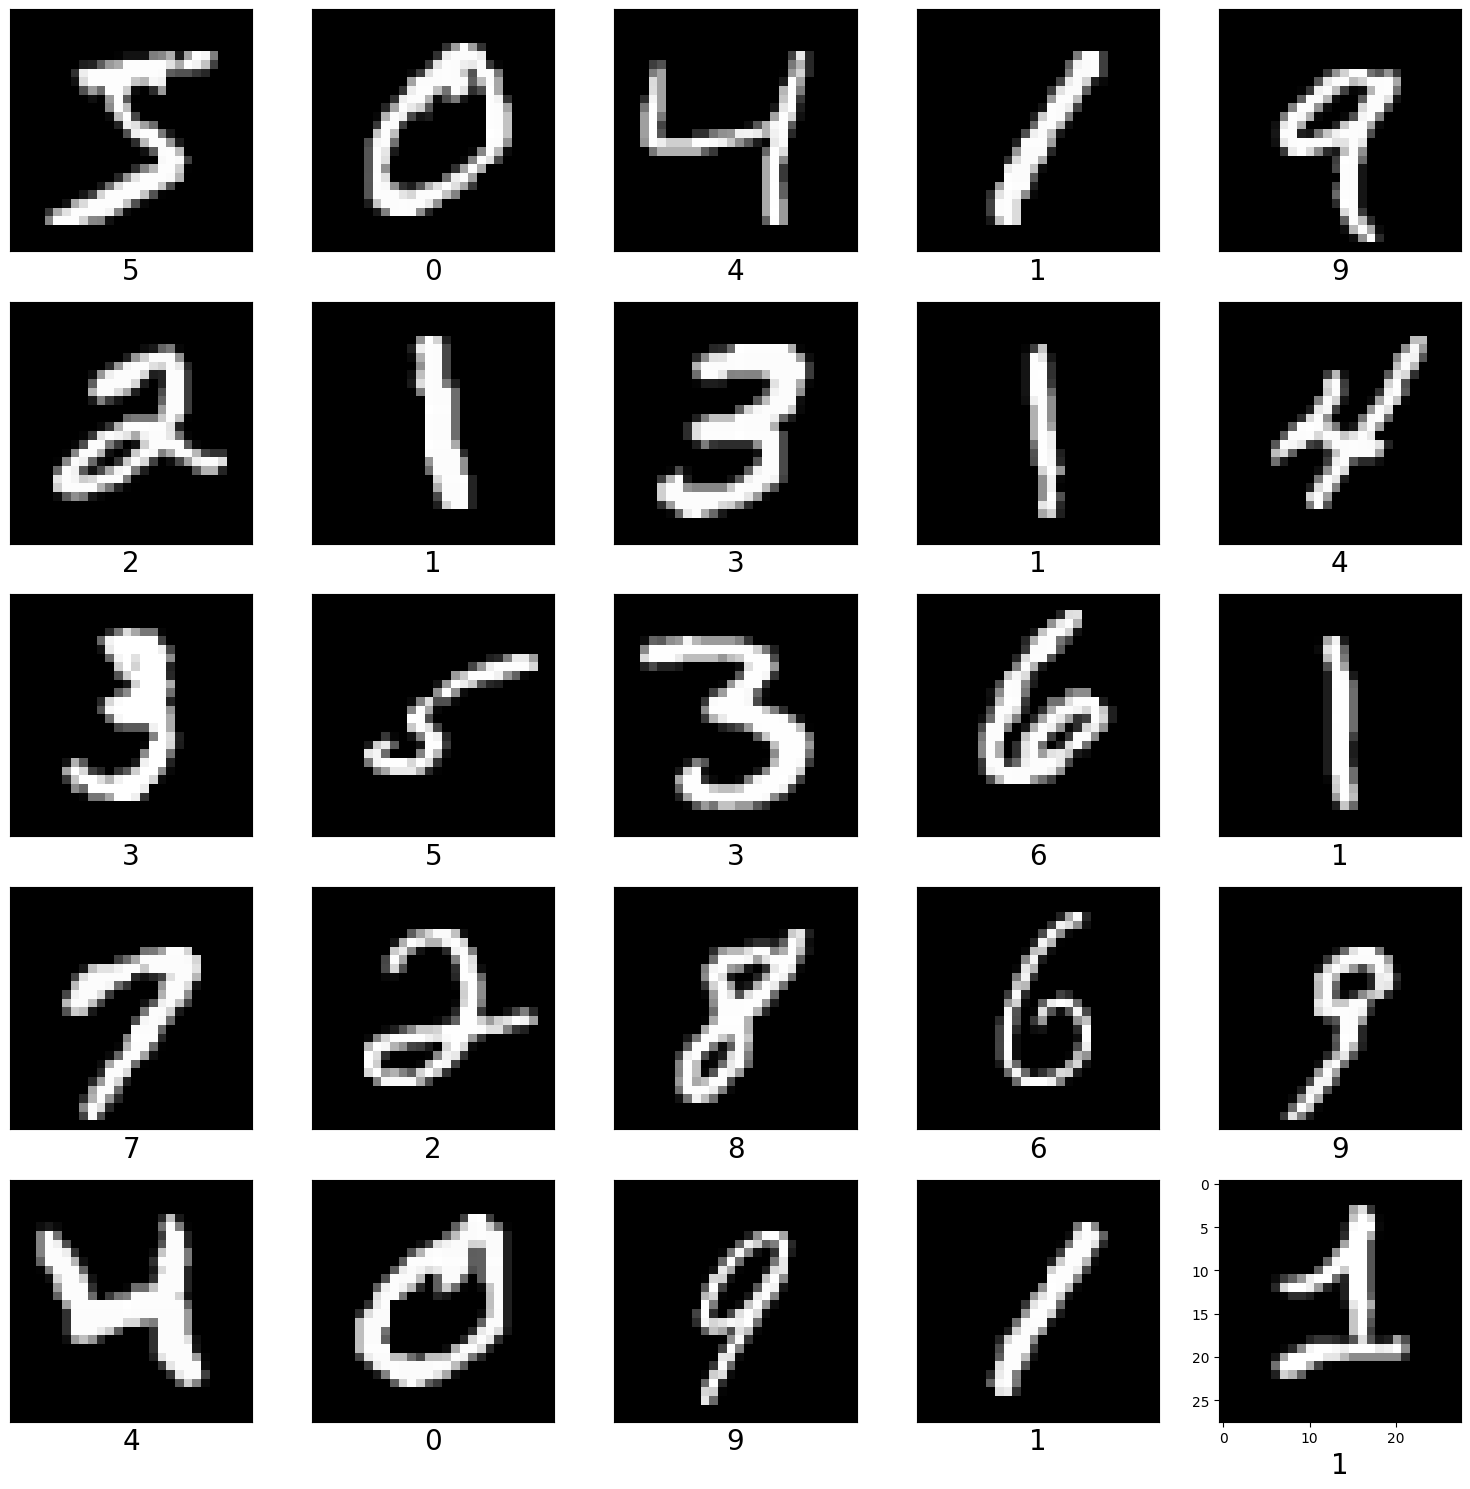

In [13]:
# Visualization of data


plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_images[i], cmap = "gray")
    plt.xlabel(y_train_labels[i], fontsize = 20)

plt.tight_layout()
plt.show()

In [14]:
# Pre-processing the images and labels
# Now, That we know that our X_train_image, X_test_images is conist of below:-
# ** Images size ranges from 0 to 255 **
# 1) Maximum value is 255
# 2) Minimum value is 0

# So, We can perform below things:-
# 1) We can not scale the image to range [0, 1] 
# 2) Change the type of the image to "float32" when scaling to [0, 1]

X_train_image = X_train_images.astype("float32") / 255.0
X_test_images = X_test_images.astype("float32") / 255.0

print(X_train_images[0].shape) # (28, 28)
print(X_test_images[0].shape) # (28, 28)
# Below code will added an extra axis at the end representing channel.
X_train_images = np.expand_dims(a = X_train_image, axis = -1)
X_test_images = np.expand_dims(a = X_test_images, axis = -1)
print(X_train_images.shape) # (60000, 28, 28, channel = 1)
print(X_test_images.shape) # (10000, 28, 28, channel = 1)

(28, 28)
(28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
print(y_train_labels)

[5 0 4 ... 5 6 8]


In [16]:
# Convert y_train_lables and y_test_labels to binary class metrics
num_classes = 10
y_train_labels = to_categorical(y_train_labels, num_classes)
y_test_labels = to_categorical(y_test_labels, num_classes)

In [17]:
print(y_train_labels.shape)

(60000, 10)


In [18]:
print(y_test_labels.shape)

(10000, 10)


In [19]:
# Now! We can proceed with the development of the model.

model = Sequential(
    [
        Input(shape = (28, 28, 1)),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', data_format = None, 
               dilation_rate = (1, 1), groups = 1, activation = "relu", use_bias = True, 
               kernel_initializer = "glorot_uniform", bias_initializer = "zeros", 
               kernel_regularizer = None, bias_regularizer = None, activity_regularizer = None, 
               kernel_constraint = None, bias_constraint = None),
        MaxPooling2D(pool_size = (2, 2), strides = None, padding = "valid", data_format = None),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid", activation = "relu"),
        MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid", data_format = None),
        Flatten(),
        Dropout(0.5),
        Dense(units = num_classes, activation = "softmax", use_bias = True, kernel_initializer = "glorot_uniform", 
              bias_initializer = "zeros", kernel_regularizer = None, bias_regularizer = None,
              activity_regularizer = None, kernel_constraint = None, bias_constraint = None)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0

In [20]:
# Train the CNN model
# TODO: 
# why Adam optimizer ?
# Why categorical_crossentropy as a loss function
# More than one metrics ?
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

history = model.fit(x = X_train_images, y = y_train_labels, 
                    epochs = 5, validation_split = 0.1, 
                    validation_data = (X_test_images, y_test_labels), 
                    shuffle = True)


Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1644 - accuracy: 0.9497 - mse: 0.0075 - val_loss: 0.0453 - val_accuracy: 0.9858 - val_mse: 0.0022
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0641 - accuracy: 0.9801 - mse: 0.0031 - val_loss: 0.0329 - val_accuracy: 0.9885 - val_mse: 0.0017
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0486 - accuracy: 0.9856 - mse: 0.0023 - val_loss: 0.0322 - val_accuracy: 0.9900 - val_mse: 0.0016
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0406 - accuracy: 0.9870 - mse: 0.0020 - val_loss: 0.0281 - val_accuracy: 0.9908 - val_mse: 0.0014
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0359 - accuracy: 0.9890 - mse: 0.0017 - val_loss: 0.0321 - val_accuracy: 0.9895 - val_mse: 0.0016


In [21]:
# Save the entire model (architecture and weights) to the current directory

model.save("p3_CNN_Saved_model.h5")

c:\Sem_3\Backup\venv-test\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Load the entire model (architecture and weights) from the current directory
model = load_model("p3_CNN_Saved_model.h5")

In [23]:
# Evaluate the train model
score = model.evaluate(X_test_images, y_test_labels)
print(f"Model loss :- {score[0]}")
print(f"Model Accuracy :- {score[1]}")
print(f"Mean Square Error (MSE):- {score[2]}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0321 - accuracy: 0.9895 - mse: 0.0016
Model loss :- 0.032113511115312576
Model Accuracy :- 0.9894999861717224
Mean Square Error (MSE):- 0.0015577251324430108


[]

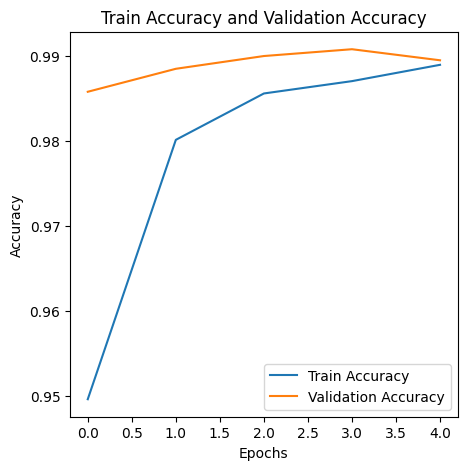

In [24]:
# Plotting the training accuracy (accuracy) and validation accuracy (val_accuracy)

plt.figure(figsize = (5, 5))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "validation Accuracy")
plt.title(label = "Train Accuracy and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"], loc = "lower right")
plt.plot()

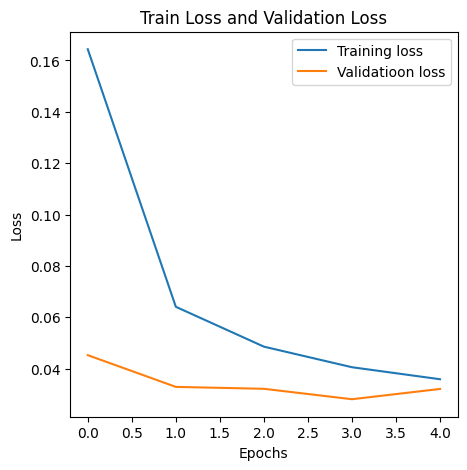

In [25]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validatioon loss"], loc = "upper right")
plt.show()

[]

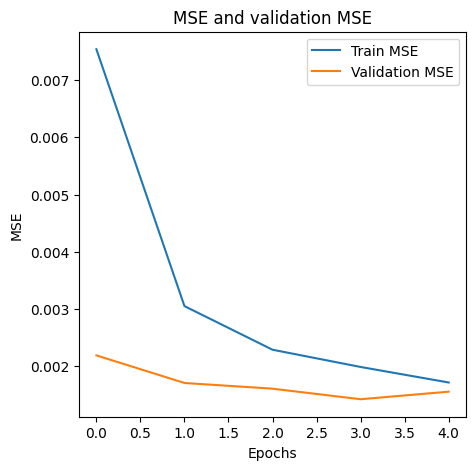

In [26]:
# Plotting the Mean Square Error (mse) and Validation MSE (val_mse)
plt.figure(figsize = (5, 5))
plt.plot(history.history["mse"], label = "Train MSE")
plt.plot(history.history["val_mse"], label = "validation MSE")
plt.title("MSE and validation MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Train MSE", "Validation MSE"], loc = "upper right")
plt.plot() 

In [27]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels))

313/313 [==============================] - 2s 5ms/step
Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



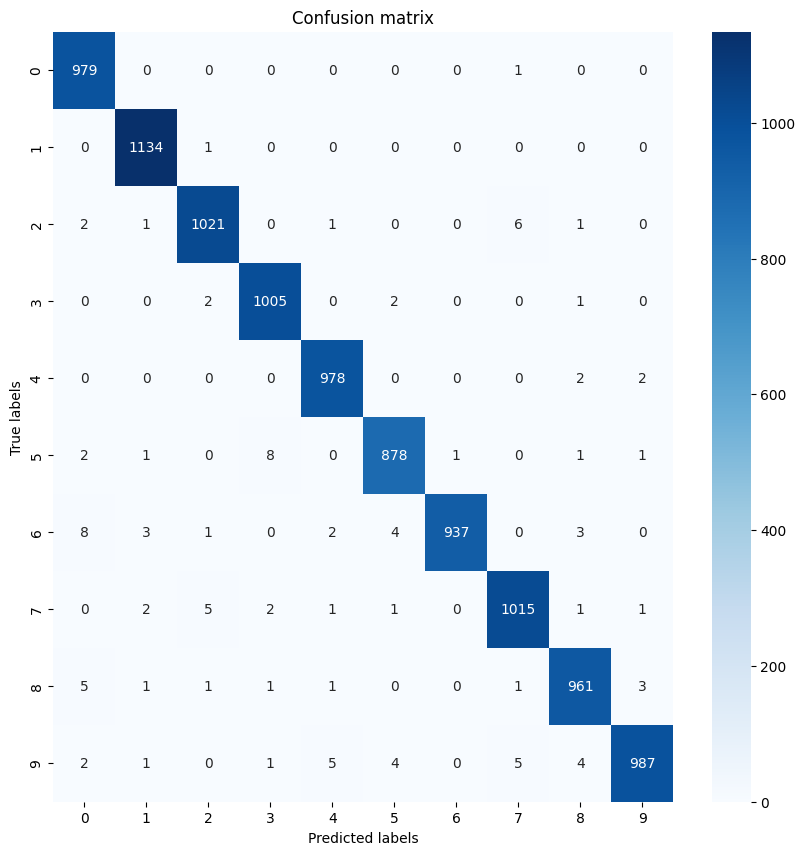

In [28]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()


313/313 [==============================] - 2s 5ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_12856\2603876897.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


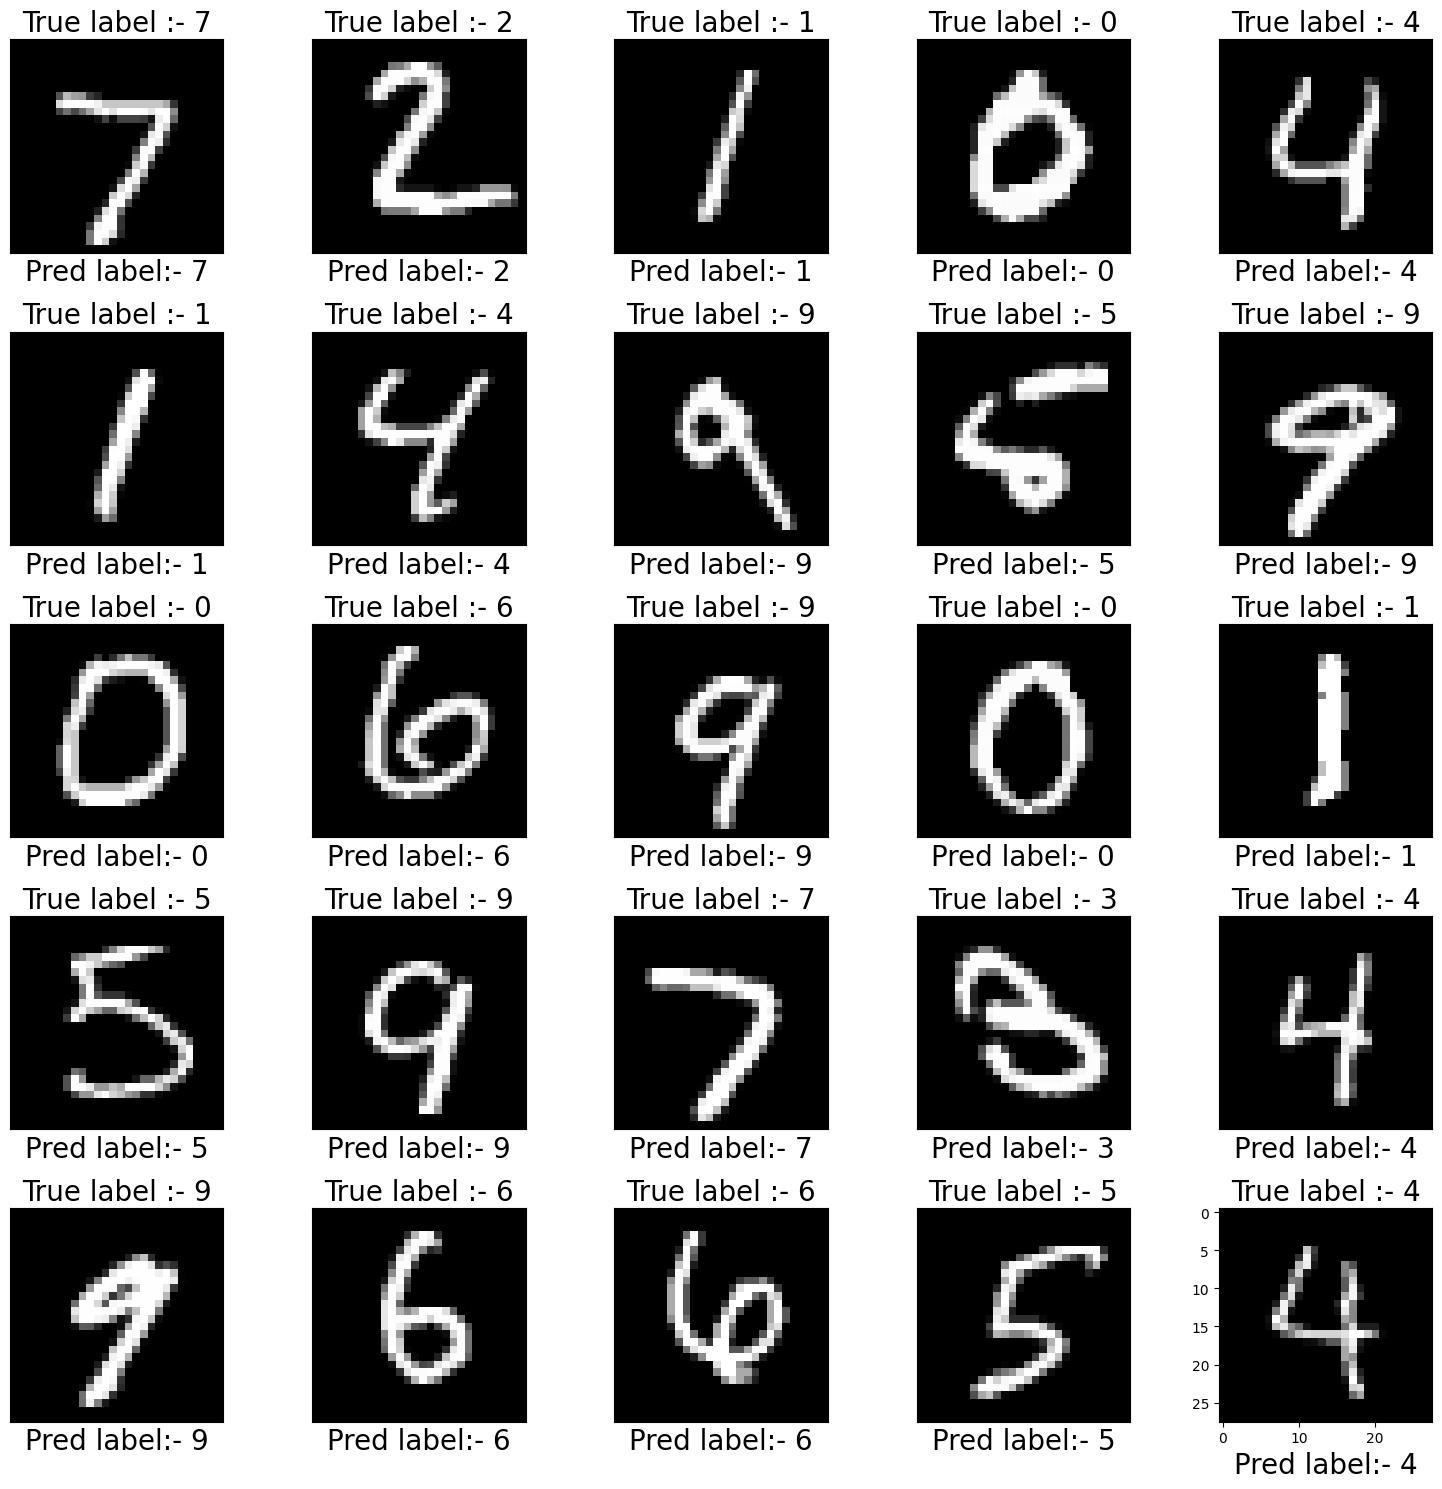

In [29]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

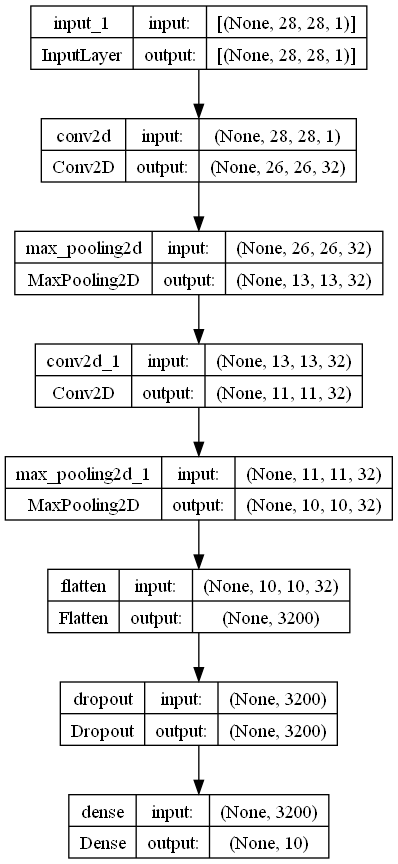

In [34]:
# plot the model # https://graphviz.gitlab.io/download/
# Download and run the graphviz-8.1.0 (64-bit) EXE installer [sha256] and 
# click to checbox of add environment variable to all user and icon in desktop
# pip install pydot and ( --> Seperate installation )pip install graphviz
# Check in terminal `` dot -v `` for successful installation.
plot_model(model, to_file = "p3_model_diagram.png", show_shapes = True, show_layer_names = True)

In [ ]:
# Method 2:-
# Visualizing the NN model through netron
# pip install netron
# After successful installation type ```netron``` in terminal. It will open in localhost

In [36]:
# Method 3 # Tensorboard method

from tensorflow.keras.callbacks import TensorBoard

# All callbacks will be saved in logs folder.
model_callbacks = TensorBoard(log_dir = "p3_logs")

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

model.fit(x = X_train_images, y = y_train_labels, 
                epochs = 5, validation_split = 0.1, 
                validation_data = (X_test_images, y_test_labels), 
                shuffle = True, callbacks = model_callbacks)

# in terminal type :- tensorboard --logdir=p3_logs

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0332 - accuracy: 0.9891 - mse: 0.0017 - val_loss: 0.0221 - val_accuracy: 0.9922 - val_mse: 0.0011
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0289 - accuracy: 0.9907 - mse: 0.0014 - val_loss: 0.0290 - val_accuracy: 0.9902 - val_mse: 0.0014
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0268 - accuracy: 0.9914 - mse: 0.0013 - val_loss: 0.0258 - val_accuracy: 0.9925 - val_mse: 0.0012
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0248 - accuracy: 0.9922 - mse: 0.0012 - val_loss: 0.0242 - val_accuracy: 0.9930 - val_mse: 0.0011
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0241 - accuracy: 0.9923 - mse: 0.0012 - val_loss: 0.0253 - val_accuracy: 0.9915 - val_mse: 0.0013
